### Grafik Analisis Tahunan Rata-Rata Tingkat Polusi PM 2.4 per stasiun di Kalimantan

##### Data diambil dari output hasil klasifikasi  file polusi_yearly kalimantan di folder data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the provided CSV file
csv_file_path = 'data/result_station_classification_yearly.csv'
data = pd.read_csv(csv_file_path)
data.head()

,date,stasiun,pm 2.5,Pollution Level,Pollution Level Description,Predicted Pollution Level,Predicted Pollution Level Description
0,2023,Balikpapan Sepinggan,60.211111,1,Moderate,1,Moderate
1,2023,Balikpapan sepinggan,95.934783,1,Moderate,1,Moderate
2,2023,Banjar Baru Landasan Ulin,85.502924,1,Moderate,1,Moderate
3,2023,Banjarmasin Kayu Tangi,86.262857,1,Moderate,1,Moderate
4,2023,Kabupaten Barito Selatan Sanggu,79.160000,1,Moderate,1,Moderate


In [4]:
# Convert date to datetime format and extract the year
data['date'] = pd.to_datetime(data['date'], format='%Y')
data['year'] = data['date'].dt.year

# Filter data for the year 2023 and 2024
data_2023 = data[data['year'] == 2023]
data_2024 = data[data['year'] == 2024]

### Create a bar graph for average pm2.5 in 2023

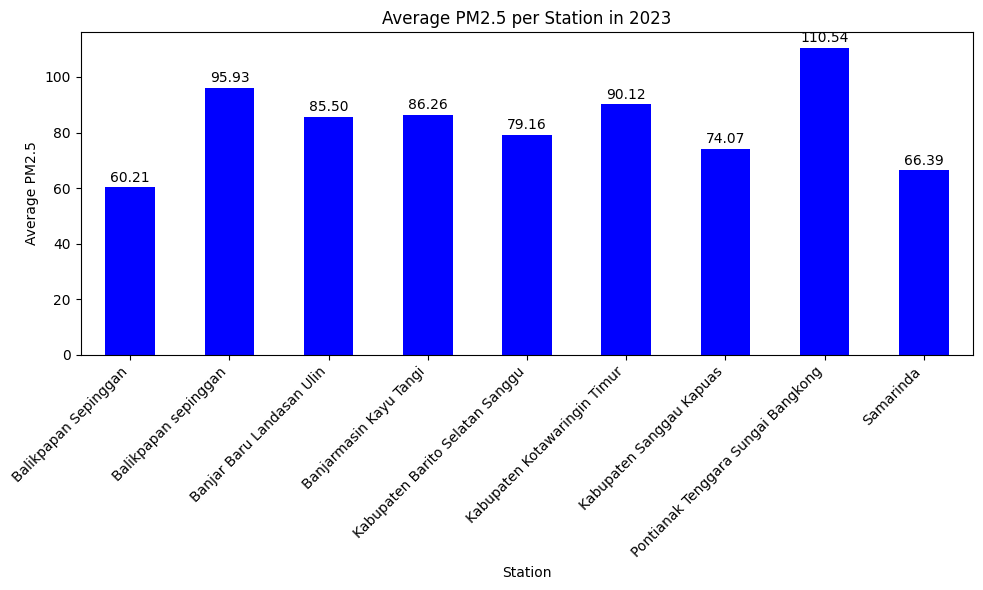

In [5]:
# Create the first graph for 2023
plt.figure(figsize=(10, 6))
avg_pm25_2023 = data_2023.groupby('stasiun')['pm 2.5'].mean()
avg_pm25_2023.plot(kind='bar', color='blue')

# Set the title and labels for 2023 graph
plt.title('Average PM2.5 per Station in 2023')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45, ha='right')

# Add the value label on each bar for 2023
for i, value in enumerate(avg_pm25_2023):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Create a bar graph for average pm2.5 in 2024

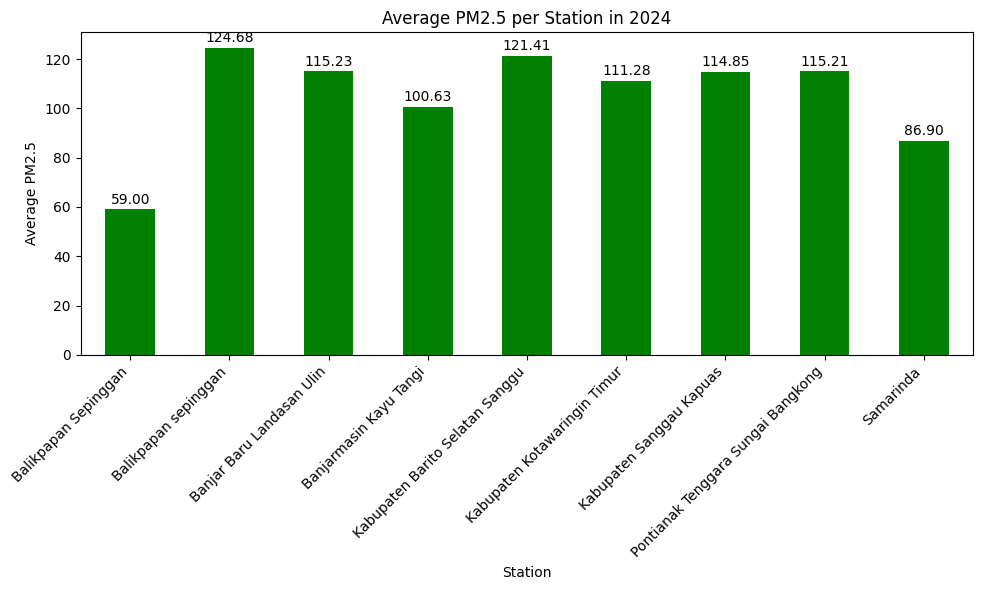

In [6]:
# Create the second graph for 2024
plt.figure(figsize=(10, 6))
avg_pm25_2024 = data_2024.groupby('stasiun')['pm 2.5'].mean()
avg_pm25_2024.plot(kind='bar', color='green')

# Set the title and labels for 2024 graph
plt.title('Average PM2.5 per Station in 2024')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45, ha='right')

# Add the value label on each bar for 2024
for i, value in enumerate(avg_pm25_2024):
    plt.text(i, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()